<ai id = "Intro"></a>
## PROJECT: Investigating Student's Performance

## 📖 Background
My best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

I am serving as a Data Analyst to help my friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

> This was a past a data analytics challenge on DataCamp

## 💾 Data Description

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Questions to Answer from this Dataset

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).Looking at the effects within subgroups. 
5. The principal wants to know if kids who perform well on one subject also score well on the others. Looking at the correlations between scores. 

- Summarize findings.

In [1]:
# import statements for all of the packages I plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



<a id = "Data Wrangling"></a>
## Data Wrangling

### General Properties
In this section, we want to display, check and examine the general properties and structure of the data in our dataset and observe if there are abnormalies or cleaning processes that we might want to proceed with at the cleaning stage.


In [4]:
# Load data for inspection 
examsData = pd.read_csv("exams.csv")

# Display the first five roles of the data
examsData.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Display info the describe the datatypes and the shape of the data
examsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#Describe the statistical properties of the numerical data
examsData.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#identify the number of unique values the categorical data contains
unique_values = examsData.drop(columns = ["math","reading","writing"], axis = 1).nunique()
unique_values

gender                    2
race/ethnicity            5
parent_education_level    6
lunch                     2
test_prep_course          2
dtype: int64

In [8]:
# to view the unique values for each categorical data
for column in examsData.drop(columns = ["math","writing","reading"]):
    print(column)
    print(examsData[column].unique())
    print('\n')

gender
['female' 'male']


race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']


parent_education_level
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


lunch
['standard' 'free/reduced']


test_prep_course
['none' 'completed']




In [9]:
#inspect for duplicates
examsData[examsData.duplicated()].count()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

### Summary
We have 999 rows and 8 columns; 
The data info shows that we have no null values and no duplicates values. 
The data entries also make statistical and categorical sense jugding from the outputs of the "describe" and "unique" methods.
 

### Data Cleaning
- I would love to rename some column names e.g "race/ethnicity" column to a single word; so the length of the name is not so long.
> I can do this using the rename method

In [10]:
examsData.rename({"race/ethnicity":"race","parent_education_level":"parent_education","test_prep_course":"test_prep"},axis = 1, inplace = True)
examsData.head()

,gender,race,parent_education,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<a id='eda'></a>
## Exploratory Data Analysis
Here, we will compute statistics and create visualizations with the goal of addressing the research questions that was posed in the Introduction section.

### Research Question 1 
#### What are the average reading scores for students with/without the test preparation course?

In [11]:
testPrepRead = examsData.groupby("test_prep")[["reading"]].mean().round(2).sort_values(["reading"], ascending = True)
testPrepRead

,reading
test_prep,
none,66.53
completed,73.89


Text(0.5, 1.0, ' Average reading scores for the different test prep levels')

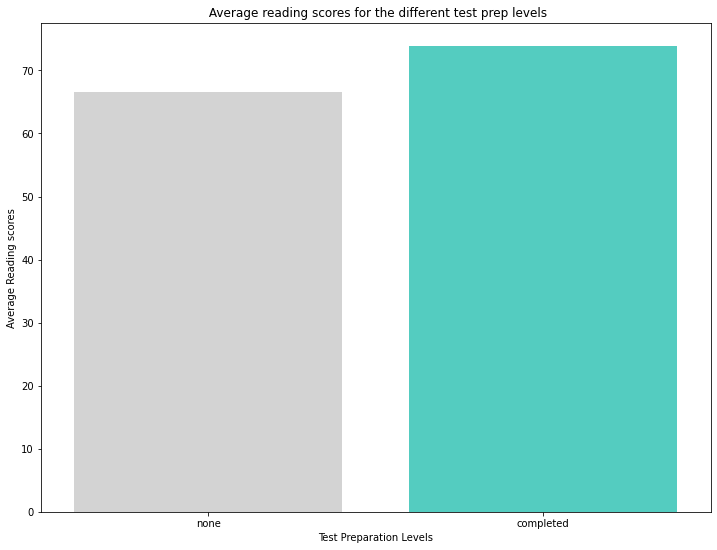

In [105]:
fig,ax = plt.subplots(figsize = (12,9))

#showing a plot with default mean estimator
ax = sns.barplot(x =testPrepRead.index, y = "reading", data = testPrepRead, palette = set_custom_palette(testPrepRead['reading']))
#setting labels
ax.set(xlabel ="Test Preparation Levels", ylabel = "Average Reading scores")
ax.set_title(" Average reading scores for the different test prep levels")

This plot reveals that those that take test preparations scored higher than those didn't take the testptrep.

### Research Question 2
#### What are the average reading scores for the different parental levels?

In [12]:
parentEduRead = examsData.groupby("parent_education")[[("reading")]].mean().sort_values(["reading"], ascending = True).round(2)
parentEduRead


,reading
parent_education,
high school,64.70
some high school,66.94
some college,69.46
associate's degree,70.93
bachelor's degree,73.00
master's degree,75.37


In [13]:
#highlight the column with the maximum value
def set_custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    """" This is used to highlight the column with the maximum value"""
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

Text(0.5, 1.0, ' Average reading scores for the different parental levels')

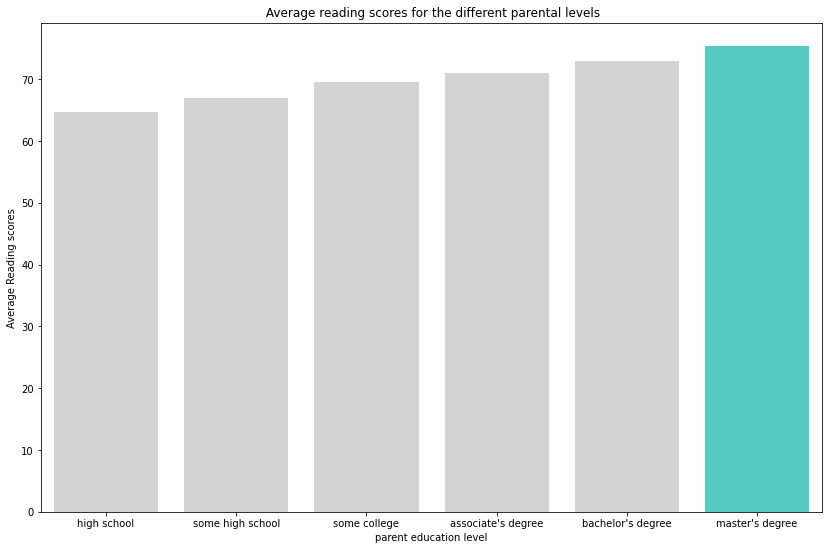

In [14]:

fig,ax = plt.subplots(figsize = (14,9))

#showing a plot with default mean estimator
ax = sns.barplot(x =parentEduRead.index, y = "reading", data = parentEduRead, palette = set_custom_palette(parentEduRead['reading']))
#setting labels
ax.set(xlabel ="parent education level", ylabel = "Average Reading scores")
ax.set_title(" Average reading scores for the different parental levels")




This plot reveals that students whose parents have a higher level of education do better than those with parents of lower degree levels.


### Research Question 4
#### Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).Looking at the effects within subgroups. 


In [15]:
# looking at categories of the test scores based on the test prep and parent education
more_categories = examsData.groupby(["test_prep","parent_education"])[["reading","writing","math"]].mean()
more_categories

reading    writing       math
test_prep parent_education                                   
completed associate's degree  76.170732  76.817073  71.829268
          bachelor's degree   76.739130  78.695652  73.282609
          high school         67.839286  68.053571  65.000000
          master's degree     78.250000  80.100000  70.600000
          some college        75.987013  76.519481  71.454545
          some high school    70.948052  70.363636  66.701299
none      associate's degree  67.857143  65.842857  65.571429
          bachelor's degree   70.611111  69.986111  66.902778
          high school         63.450000  60.207143  60.992857
          master's degree     73.897436  73.410256  69.307692
          some college        66.087248  64.872483  64.892617
          some high school    63.911765  60.754902  61.078431

In [16]:
# creating a dataframe for the completed test_prep category based on the grouping above
testPrepCompleted = more_categories.loc["completed"]
testPrepCompleted



,reading,writing,math
parent_education,,,
associate's degree,67.857143,65.842857,65.571429
bachelor's degree,70.611111,69.986111,66.902778
high school,63.450000,60.207143,60.992857
master's degree,73.897436,73.410256,69.307692
some college,66.087248,64.872483,64.892617
some high school,63.911765,60.754902,61.078431


In [17]:
# creating a dataframe for the completed test_prep category based on the grouping above
testPrepNone = more_categories.loc["none"]
testPrepNone

,reading,writing,math
parent_education,,,
associate's degree,67.857143,65.842857,65.571429
bachelor's degree,70.611111,69.986111,66.902778
high school,63.450000,60.207143,60.992857
master's degree,73.897436,73.410256,69.307692
some college,66.087248,64.872483,64.892617
some high school,63.911765,60.754902,61.078431


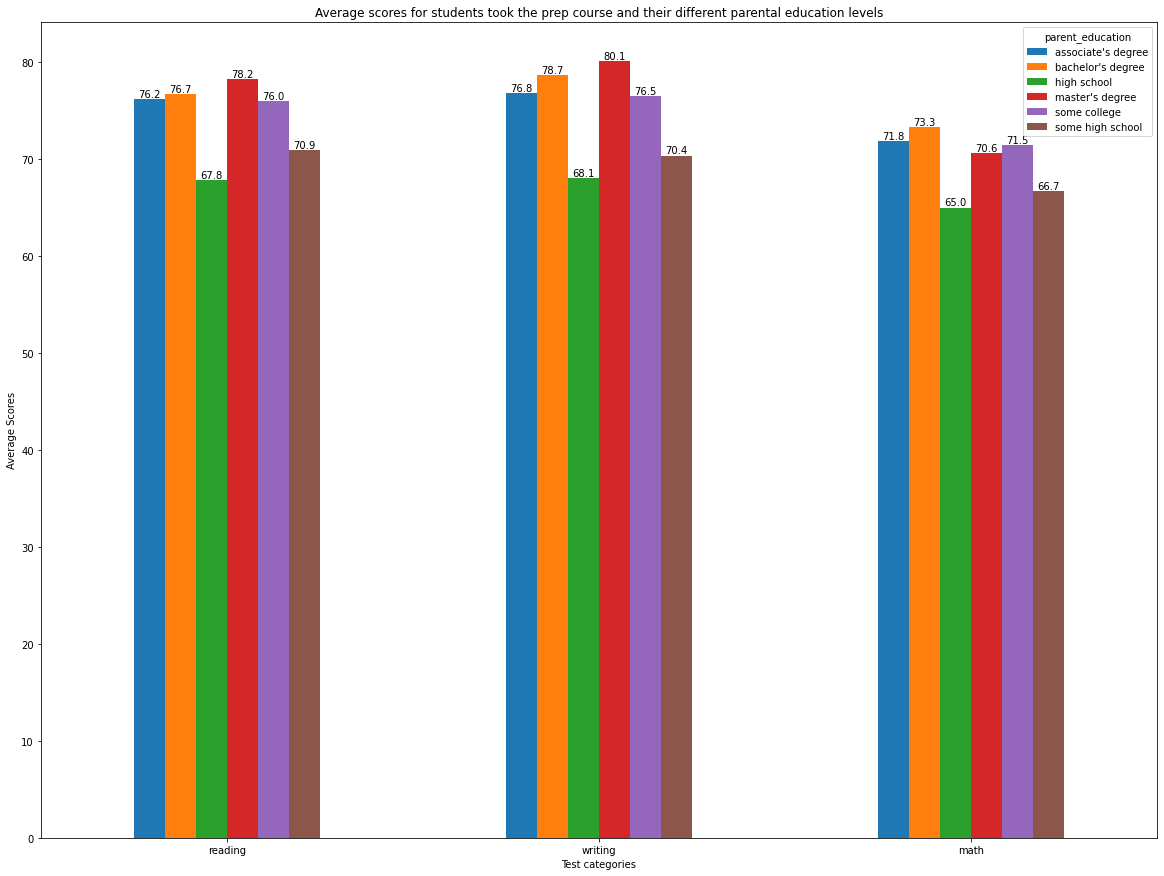

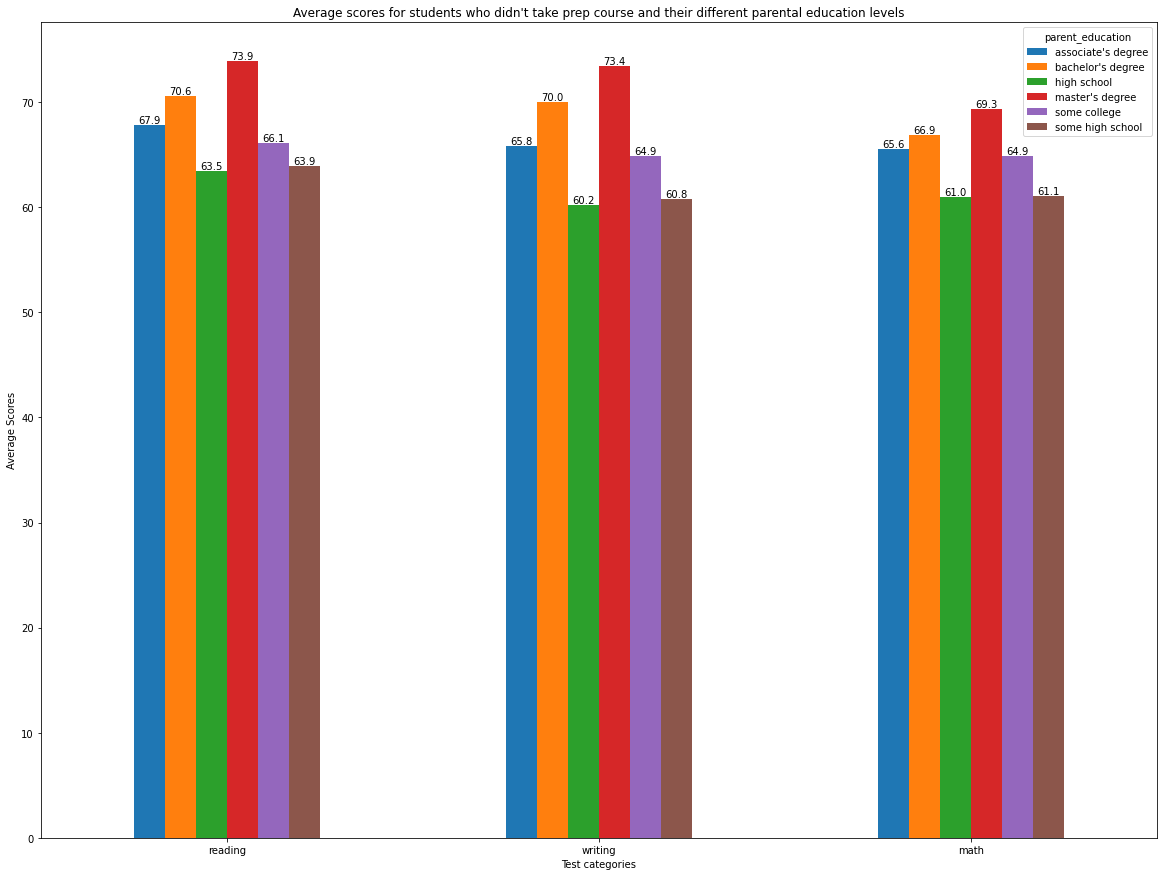

In [20]:
# plot the transpose of testprep categories, so that we can how from a graph how each parental group affect the test scores.
plot_testPrepCompleted = testPrepCompleted.T.plot(kind="bar",figsize=(20, 15),rot=0)

plot_testPrepCompleted.set_title("Average scores for students took the prep course and their different parental education levels")
plot_testPrepCompleted.set_xlabel("Test categories")
plot_testPrepCompleted.set_ylabel("Average Scores")
for container in plot_testPrepCompleted.containers:
    plot_testPrepCompleted.bar_label(container, fmt='%.1f')

plot_testPrepNone = testPrepNone.T.plot(kind="bar",figsize=(20, 15),rot=0)

plot_testPrepNone.set_title("Average scores for students who didn't take prep course and their different parental education levels")
plot_testPrepNone.set_xlabel("Test categories")
plot_testPrepNone.set_ylabel("Average Scores")
for container in plot_testPrepNone.containers:
    plot_testPrepNone.bar_label(container, fmt='%.1f')

The plot above shows that students whose parent have higher degrees out perfomed those whose parents had lower degrees whether or not they took test preps. The effect of the test prep was evident in the magnitude of their scores during the tests. Those that took the test prep scored higher than those who didn't.

Let's take a look at the difference between these scores(between students with/without prep scores) to help the school principal know what subject requires more preparration.

> I want to plot a scatter plot between math, writting, and reading; with parent education as the x - axis; hue as test_prep

In [35]:
# finding the difference in the scores for those that completed a test prep and those that did not
differenceInTestPrep = testPrepCompleted.subtract(testPrepNone)
differenceInTestPrep

,reading,writing,math
parent_education,,,
associate's degree,8.313589,10.974216,6.257840
bachelor's degree,6.128019,8.709541,6.379831
high school,4.389286,7.846429,4.007143
master's degree,4.352564,6.689744,1.292308
some college,9.899765,11.646997,6.561928
some high school,7.036287,9.608734,5.622867


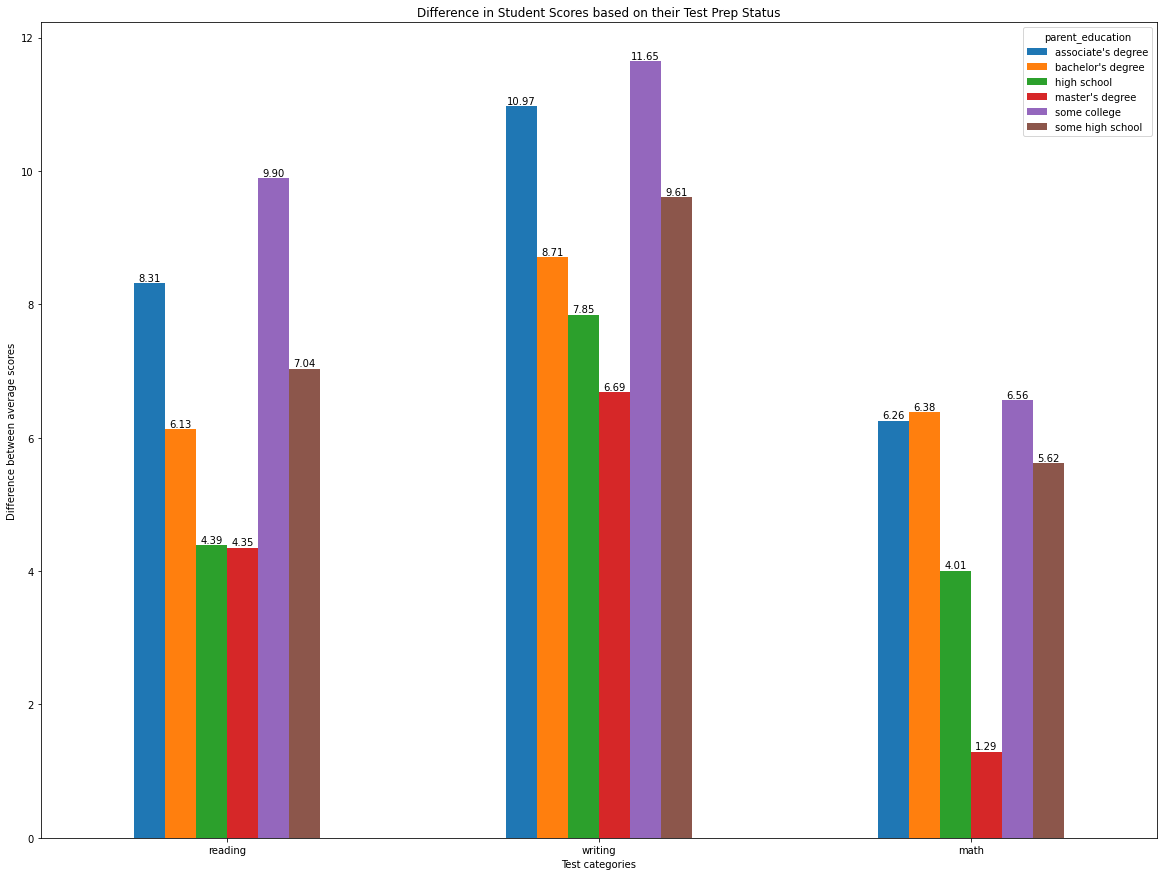

In [42]:
#plot to show difference in scores based on their test prep status
ax = differenceInTestPrep.T.plot(kind = "bar", figsize = (20,15), rot = 0 )
ax.set(xlabel = "Test categories", ylabel = "Difference between average scores", title = "Difference in Student Scores based on their Test Prep Status")
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f')


This graph reveals the following:

For the Reading scores:
- The effect of the test prep created a gap in the test scores. 
- Students with parental level of education as "some college","some high college,"associate degree","bachelors degree" should give more attention to their test prep status. The difference for students with parent education level as "Masters" and "high school" did well but they could also be improvement.

For the Writing scores:
- The plot shows a huge gap in the test scores. 
- It seems that "writing" is a subject that can be aced most often by preparing. The plot reveals this.
- All students should be encouraged to complete their test prep classes

For the Math scores:
- The plot reveals that the stdents are better in math than other courses whether they take the test_prep or not. 
- However, those students that took the test prep and whose parent have masters degrees did better.
- However, the school should encourage students whose parents have educational status as "associates degree", "some colleges", "bachelors", "some high school"

Students whose parents have educational status equals "high school" should be given more attention. Their scores have a little difference. This is because, they have low scores with/without the test prep compared to their conterparts. In the case of their counterparts, they had high scores with the test prep and a reduced score when they didn't take the test prep, hence, the spike in the difference. 

The school should give attention to students whose parent education status equals "high school"  


### Research Question 5
####  The principal wants to know if kids who perform well on one subject also score well on the others. Looking at the correlations between scores. 

> Let's check if there is a correration between the performance of students in one test and other tests by first, querying the scores to select excellent scores only. Excellent scores equals 75 and above.

In [29]:
#correlation check using the test scores for all students
# Assuming that the mark for an "A" equals 75
examsDataExcellent = examsData.query('math>=75 & reading>=75 & writing >= 75 ')
examsDataExcellent


,gender,race,parent_education,lunch,test_prep,math,reading,writing
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
995,female,group E,master's degree,standard,completed,88,99,95


In [49]:
# finding the correlation
examsDataExcellent.corr(method ='pearson')

,math,reading,writing
math,1.000000,0.461624,0.370127
reading,0.461624,1.000000,0.814716
writing,0.370127,0.814716,1.000000


<AxesSubplot:xlabel='math', ylabel='reading'>

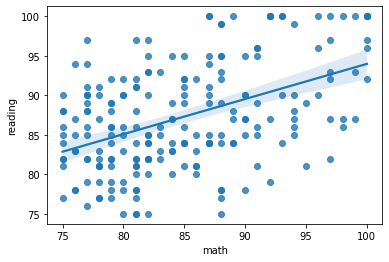

In [34]:
sns.regplot(x="math", y="reading", data = examsDataExcellent)

<AxesSubplot:xlabel='math', ylabel='writing'>

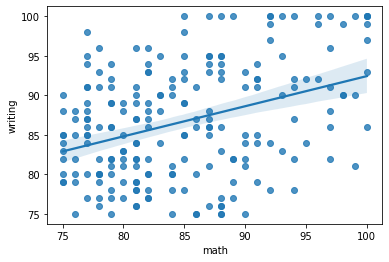

In [37]:
sns.regplot(x="math", y="writing", data = examsDataExcellent)

<AxesSubplot:xlabel='writing', ylabel='reading'>

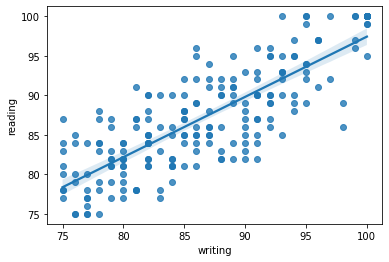

In [36]:
sns.regplot(x="writing", y="reading", data = examsDataExcellent)

In [50]:
numTestScores = examsData.select_dtypes(include=[np.number])
numTestScores.head()

,math,reading,writing
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


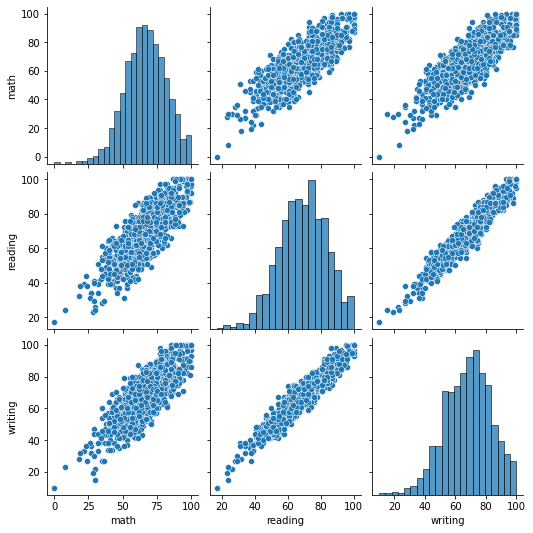

In [48]:
#showing a pairplot
ax = sns.pairplot(data =numTestScores)


In terms of correration:
- Those who do well in maths; do better in reading than in writing
- There is a high correlation between reading and writing. This means those who do well in reading also do well in writing


### Conclusion
- We have an improved test result with students that have completed their test prep.
- The parent education level has an effect on the student's test peformance. This could be due to the fact that educated parents are more enlightened and tutor their children in areas where they need help.
- The school administrators should encourage more prep in reading and writing for those that do well in maths; taking a cue from the correlation results.
- Students whose parental background reads "high school" should be given the most attention; so that they can improve in their test scores.